In [23]:
import numpy as np
from scipy import signal
from tqdm import tqdm
from librosa import power_to_db
from DistantSpeech.doa.srp import srp
from DistantSpeech.beamformer.MicArray import MicArray
from DistantSpeech.beamformer.utils import load_audio as audioread
from DistantSpeech.beamformer.utils import pmesh, pt

In [24]:
array_data = []
for n in range(2,6):
    filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/rec1/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/1/wav/音轨-{}.wav'.format(n)
    filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/aioffice/1/ch4/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/2/ch4/音轨-{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/2/sim_noisy/sim_noisy_{}.wav'.format(n)
    # filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/anechoic/2/ch4/音轨-{}.wav'.format(n)
    data_ch = audioread(filename)
    array_data.append(data_ch)
array_data = np.transpose(np.array(array_data))
print(array_data.shape)

# filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/aioffice/1_sim/sim_noisy.wav'
# array_data = audioread(filename)

(346680, 4)


/home/wangwei/work/DistantSpeech/DistantSpeech/beamformer/utils.py:183: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, audio_data = wavfile.read(filename)


In [25]:
mic_array = MicArray(arrayType='circular', r=0.032, M=4)
srp_obj = srp(mic_array)
angle_spectrum, p = srp_obj.compute_angle_spectrum(array_data, resolution=1)


100%|██████████| 360/360 [00:54<00:00,  6.56it/s]


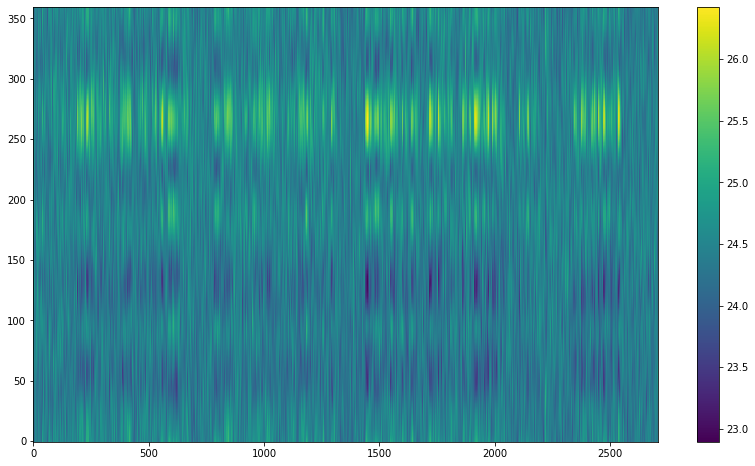

(360, 2708)


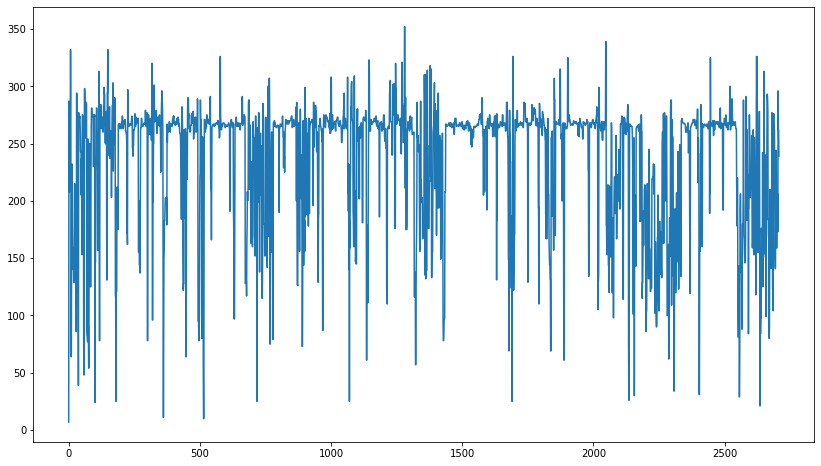

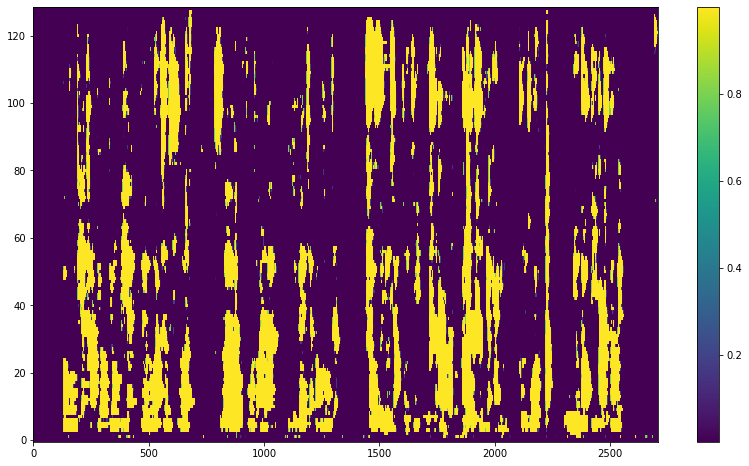

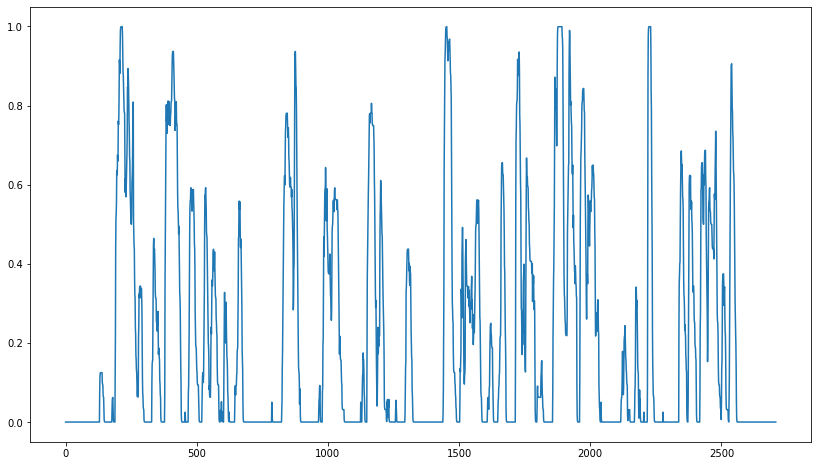

In [26]:
pmesh(power_to_db(angle_spectrum))
print(angle_spectrum.shape)
max_index = np.argmax(power_to_db(angle_spectrum), axis=0)

pt(signal.medfilt(max_index))

pmesh(p)
pt(np.mean(p[32:64], axis=0))